## Customer Behaviour Analysis Using Clustering an Regression

### Import libraries necessary for this project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

### Loading Dataset

In [2]:
customer_dataset = pd.read_csv('Wholesale customers data.csv')

In [3]:
customer_dataset.shape

(440, 8)

In [4]:
customer_dataset.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null int64
Region              440 non-null int64
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
customer_dataset['Channel'] = customer_dataset['Channel'].astype('category')
customer_dataset['Region'] = customer_dataset['Region'].astype('category')
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
Channel             440 non-null category
Region              440 non-null category
Fresh               440 non-null int64
Milk                440 non-null int64
Grocery             440 non-null int64
Frozen              440 non-null int64
Detergents_Paper    440 non-null int64
Delicassen          440 non-null int64
dtypes: category(2), int64(6)
memory usage: 21.8 KB


In [7]:
# Get the means 
mean_data = customer_dataset.describe().loc['mean', :]
print(mean_data)

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
Name: mean, dtype: float64


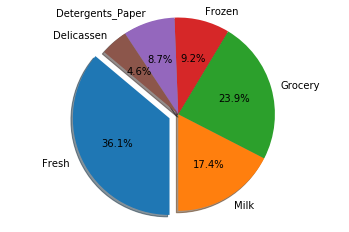

In [8]:
# Attributes for the pie chart
labels = 'Fresh ', 'Milk','Grocery' ,'Frozen' ,'Detergents_Paper' ,'Delicassen'  
sizes = [12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455]
#colors = ['yellowgreen','lightcoral',''] #,color for the portions  colors=colors,
explode = (0.1, 0,0,0,0,0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

In [9]:
# Splitting the dataset into the training and test sets
X = customer_dataset
y = customer_dataset["Fresh"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 0)
print(X_train.head(5))

X_test0 = X_test
y_test0 = y_test

    Channel Region  Fresh   Milk  Grocery  Frozen  Detergents_Paper  \
14        2      3  24653   9465    12091     294              5058   
299       1      2    444    879     2060     264               290   
356       1      3  22686    134      218    3157                 9   
200       2      1   3067  13240    23127    3941              9959   
220       1      1  14755    899     1382    1765                56   

     Delicassen  
14         2168  
299         259  
356         548  
200         731  
220         749  


### Evaluating the regression Algorithm on the dataset

In [10]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm.intercept_)
print(lm.coef_)

-3.637978807091713e-12
[ 6.61447799e-13 -1.71656997e-13  1.00000000e+00  1.03320934e-15
 -1.58959011e-16  8.07115790e-17  6.03853468e-17  4.40543594e-17]


In [11]:
y_pred = lm.predict(X_test) # Making predictions using the model
print(y_pred)

[1.5370e+03 5.9810e+03 8.0400e+03 9.7590e+03 2.7329e+04 3.1714e+04
 3.5500e+02 6.8951e+04 8.9400e+02 1.1800e+04 3.3660e+03 1.1070e+03
 1.2060e+03 2.5767e+04 7.8580e+03 2.7870e+03 1.5168e+04 2.3000e+01
 2.7167e+04 3.7036e+04 3.2717e+04 2.0000e+02 1.1686e+04 6.3730e+03
 5.5670e+03 9.6020e+03 3.0620e+03 2.2321e+04 3.7000e+01 5.3205e+04
 1.9820e+03 7.0570e+03 7.1700e+02 2.6470e+03 5.4200e+02 4.0980e+03
 1.6890e+03 1.1405e+04 7.3880e+03 5.1130e+03 3.4630e+03 3.9228e+04
 1.7773e+04 8.7970e+03 3.6050e+04 5.2240e+03 1.1594e+04 8.6560e+03
 2.2335e+04 1.4438e+04 1.0253e+04 1.8380e+03 3.3170e+03 1.7250e+03
 8.5900e+03 1.5354e+04 6.0800e+02 2.8257e+04 1.2126e+04 2.0105e+04
 4.4140e+03 2.8610e+03 1.9746e+04 1.9890e+03 2.5500e+02 8.0900e+03
 2.6000e+02 1.7565e+04 6.1370e+03 2.7710e+03 1.0766e+04 1.1243e+04
 8.5000e+01 1.3624e+04 2.5962e+04 3.1614e+04 9.6120e+03 3.4770e+03
 8.7080e+03 4.5640e+04 2.9320e+03 3.0090e+03 5.2830e+03 1.4903e+04
 4.9670e+03 4.0721e+04 8.1900e+03 9.8980e+03 5.1810e+03 1.0730

In [12]:
print(y_test)

208     1537
349     5981
249     8040
319     9759
54     27329
12     31714
159      355
284    68951
274      894
318    11800
10      3366
205     1107
386     1206
283    25767
261     7858
439     2787
37     15168
96        23
401    27167
142    37036
325    32717
171      200
198    11686
206     6373
21      5567
395     9602
245     3062
332    22321
357       37
259    53205
       ...  
102     2932
186     3009
301     5283
132    14903
49      4967
52     40721
74      8190
26      9898
45      5181
264     1073
4      22615
236     8635
432    21117
135     6300
263     2153
8       5963
328    16933
5       9413
122    12212
240    22096
379     4048
7       7579
231     2344
364     2615
22     31276
68      2446
322    15881
20     17546
141    30379
295     7588
Name: Fresh, Length: 110, dtype: int64


In [13]:
from sklearn.metrics import mean_squared_error, r2_score
meansqerror = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
from math import sqrt
rmse = sqrt(meansqerror)

## Printing the measures
print('Mean_Squared_Error :' ,meansqerror)
print('Root_Mean_Squared_Error :' ,rmse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 3.802917163914574e-23
Root_Mean_Squared_Error : 6.166779681417663e-12
r_square_value : 1.0


Text(0, 0.5, 'y_pred')

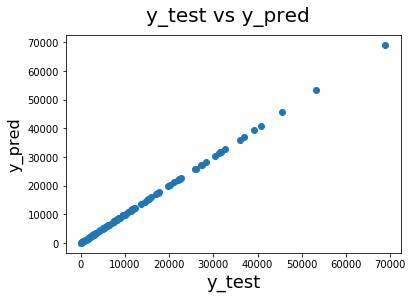

In [14]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

Text(0, 0.5, 'Index')

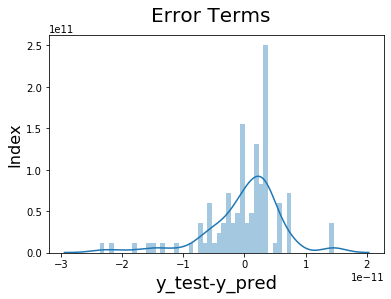

In [15]:
# Plotting the error terms to understand the distribution.
fig = plt.figure()
sns.distplot((y_test-y_pred),bins=50)
fig.suptitle('Error Terms', fontsize=20)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)  

### Clustering the customers

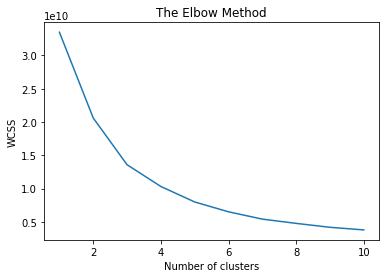

In [16]:
# Using the elbow method to find the optimal number of clusters

from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_test)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

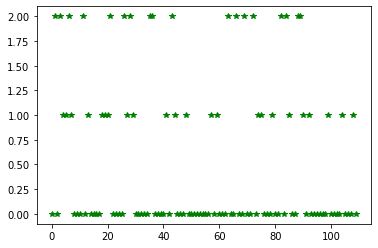

In [17]:
##Based on the above diagram, the optimal number of customer segmenets 
#is 3. After the first 3 segments, the incremental drop in error 
#for every additional segment results is significantly reduced.

# Fitting K-Means to the dataset
X3 = X_test
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X3)
plt.plot(y_kmeans, 'g*')
plt.show()

In [18]:
Customer_segment_class = pd.DataFrame(y_kmeans)
Customer_segment_class.columns = ["Customer_segment_class"]
X_test2 = X_test0.reset_index(drop=True)

Customer_segments = pd.concat([Customer_segment_class, X_test2], axis = 1)
# Customer_segments.head(5)

In [19]:
# 1st Cluster
mask = Customer_segments["Customer_segment_class"] == 0
Customer_segments_1 = Customer_segments[mask]

# 2nd Cluster
mask = Customer_segments["Customer_segment_class"] == 1
Customer_segments_2 = Customer_segments[mask]

# 3rd Cluster
mask = Customer_segments["Customer_segment_class"] == 2
Customer_segments_3 = Customer_segments[mask]

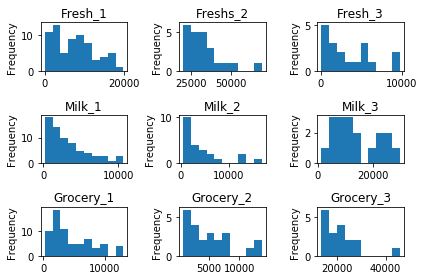

In [20]:
# Fresh

plt.subplot(331)
plt.title('Fresh_1')
Output = None
Customer_segments_1["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Freshs_2')
Output = None
Customer_segments_2["Fresh"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Fresh_3')
Output = None
Customer_segments_3["Fresh"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Milk

plt.subplot(334)
plt.title('Milk_1')
Output = None
Customer_segments_1["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Milk_2')
Output = None
Customer_segments_2["Milk"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Milk_3')
Output = None
Customer_segments_3["Milk"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Grocery

plt.subplot(337)
plt.title('Grocery_1')
Output = None
Customer_segments_1["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Grocery_2')
Output = None
Customer_segments_2["Grocery"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Grocery_3')
Output = None
Customer_segments_3["Grocery"].plot(kind = "hist", bins = 10)
plt.tight_layout()

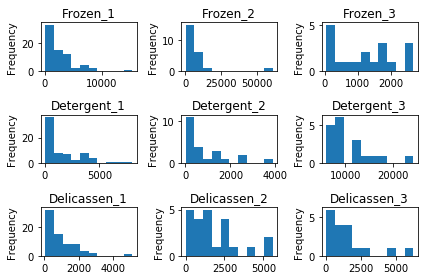

In [21]:
# Frozen

plt.subplot(331)
plt.title('Frozen_1')
Customer_segments_1["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(332)
plt.title('Frozen_2')
Customer_segments_2["Frozen"].plot(kind = "hist", bins = 10)

plt.subplot(333)
plt.title('Frozen_3')
Customer_segments_3["Frozen"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Detergent Paper

plt.subplot(334)
plt.title('Detergent_1')
Customer_segments_1["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(335)
plt.title('Detergent_2')
Customer_segments_2["Detergents_Paper"].plot(kind = "hist", bins = 10)

plt.subplot(336)
plt.title('Detergent_3')
Customer_segments_3["Detergents_Paper"].plot(kind = "hist", bins = 10)
plt.tight_layout()

# Delicassen

plt.subplot(337)
plt.title('Delicassen_1')
Customer_segments_1["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(338)
plt.title('Delicassen_2')
Customer_segments_2["Delicassen"].plot(kind = "hist", bins = 10)

plt.subplot(339)
plt.title('Delicassen_3')
Customer_segments_3["Delicassen"].plot(kind = "hist", bins = 10)
plt.tight_layout()